In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product

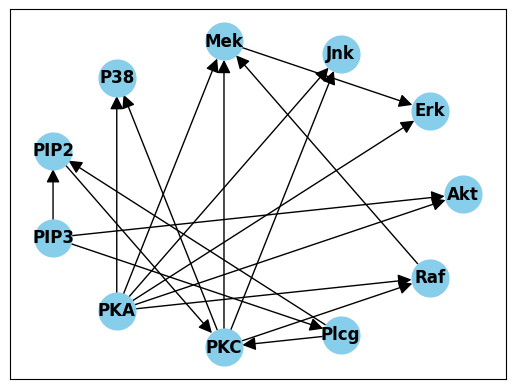

In [58]:


# Read the CSV file into a pandas DataFrame
file_path = 'dataset/consensus_adj_mat.csv'  # Replace with the path to your CSV file
data_df = pd.read_csv(file_path, index_col=0)

# Create a directed graph using networkx
G = nx.from_pandas_adjacency(data_df, create_using=nx.DiGraph)

# Draw the graph
pos = nx.circular_layout(G)  # You can change the layout if needed
nx.draw_networkx(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', arrowsize=20)

# Show the graph
plt.show()


In [59]:
G_top = nx.topological_sort(G)
print(list(G_top))

['PIP3', 'PKA', 'Plcg', 'Akt', 'PIP2', 'PKC', 'Jnk', 'P38', 'Raf', 'Mek', 'Erk']


In [60]:
# Draw the graph
#pos2 = nx.circular_layout(G_top)  # You can change the layout if needed
#nx.draw_networkx(G_top, pos2, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrowstyle="->", arrowsize=20)
#plt.show()

## Part 2

- implement inference algorithms for computing the conditional distribution of $X_{10}$ and $X_{11}$ given the onserved valiables for any choice of parameters $\psi^{(1)},...,\psi^{(11)}$.
- Test the inference algorithm using sumulated data 
- Apply the inference algorithm on the data in the data file and present the results

In [61]:
def create_CPD(variable,parent_list):
    d = 1 + len(parent_list)
    m = 2 ** 2
    columns = parent_list + [variable]
    df = pd.DataFrame(product([0,1],repeat=d),columns=columns)
    return df


In [62]:
X1 = 'X1'
X2 = 'X2'
X3 = 'X3'

parents = [X2,X3]
print(parents+[X1])
print(create_CPD(X1,[X2,X3]))

['X2', 'X3', 'X1']
   X2  X3  X1
0   0   0   0
1   0   0   1
2   0   1   0
3   0   1   1
4   1   0   0
5   1   0   1
6   1   1   0
7   1   1   1


In [74]:
data_df[["Akt","Erk","Jnk"]].shape[0]


11

In [85]:
data = pd.read_csv("dataset/sachs_bin.csv")
data

,Akt,Erk,Jnk,Mek,P38,PIP2,PIP3,PKA,PKC
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
849,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
850,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
851,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [86]:
def create_probs(dataframe):
    variables = list(dataframe.columns)
    total_outcomes = dataframe.shape[0]
    probs = []
    for var in variables: # Calculate the probability of each variable based on evidence
        fav_outcomes = dataframe[var].sum()
        prob = fav_outcomes/total_outcomes
        probs.append(prob)
    probs_df = pd.DataFrame(variables,columns=["Variable"])
    probs_df["Probability"] = probs
    return probs_df

In [87]:
probabilities = create_probs(data)
probabilities
#data['Prob'] = probabilities
#data

,Variable,Probability
0,Akt,0.230950
1,Erk,0.248535
2,Jnk,0.309496
3,Mek,0.327081
4,P38,0.406800
5,PIP2,0.349355
6,PIP3,0.370457
7,PKA,0.308324
8,PKC,0.440797


In [72]:
"""def create_probability(cpd,data):
    variables = list(cpd.columns)
    evidence = data.copy[variables]
    total_outcomes = evidence.shape[0]
    probs = []
    for var in variables:
        fav_outcomes = evidence.copy[var].sum()
        prob = fav_outcomes/total_outcomes
        
    """


In [128]:
def cpd_probs_from_data(cpd,data):
    variables = list(cpd.columns)
    evidence = data[variables]
    total_obs = evidence.shape[0]
    probs = []
    for i in range(0,cpd.shape[0]):
        row = cpd.loc[i:i]
        compare = pd.merge(row,evidence,how='inner')
        prob = compare.shape[0]/total_obs
        probs.append(prob)
    return probs
        
        
        

In [240]:
def cpd_from_data(cpd,data):
    child = list(cpd.columns)[-1]
    parents = list(cpd.columns[cpd.columns != child])
    jdist = cpd_probs_from_data(cpd,data)
    cpd['probs'] = jdist
    # restricting to evidence e = (child = 1)
    cpd_e = cpd[cpd[child] ==1].copy()
    prob_ev = cpd_e['probs'].sum()
    cpd_e['cond_prob'] = cpd_e['probs']/prob_ev
    return cpd_e


In [141]:
X1 = 'Akt'
X2 = 'Erk'
X3 = 'Mek'

parents = [X2,X3]

test1 = create_CPD(X1,parents)
test1

,Erk,Mek,Akt
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [147]:
def cpd_factor(cpd,alpha):
    variables = list(cpd.columns)
    n = len(variables)
    if n == 1:
        factor = alpha # more needed here - add to dataframe 
        cpd_e = cpd[cpd[f"{variables[n-1]}"]==1].copy()
        cpd_e["Factor"] = 1 - alpha
        return cpd_e
    else:
        child = variables[n-1]
        # restrict to X == 1
        cpd_e = cpd[cpd[f"{variables[n-1]}"]==1].copy()
        # generate factor 
        parents = cpd_e.iloc[:,:-1].copy()
        parents["sum"] = parents.sum(axis=1)
        cpd_e["Factor"] = 1 - (alpha ** (1 + parents["sum"]))
        return cpd_e
        

In [269]:
def cpd_factor_large(cpd,alpha):
    variables = list(cpd.columns)
    n = len(variables)
    if n == 1:
        factor = alpha # more needed here - add to dataframe 
        cpd_e = cpd.copy()
        cpd_e["Factor"] = 1 - alpha
        return cpd_e
    else:
        child = variables[n-1]
        # restrict to X == 1
        cpd_e = cpd.copy()
        # generate factor 
        parents = cpd_e.iloc[:,:-1].copy()
        parents["sum"] = parents.sum(axis=1)
        cpd_e["Factor"] = 1 - (alpha ** (1 + parents["sum"]))
        return cpd_e

In [ ]:
def create_factor(variable,parent_list):
    d = 1 + len(parent_list)
    m = 2 ** 2
    columns = parent_list + [variable]
    df = pd.DataFrame(product([0,1],repeat=d),columns=columns)
    return df

def cpd_factor(variable, parent_list, alpha):
    cpd = create_factor(variable, parent_list)
    variables = list(cpd.columns)
    n = len(variables)
    cpd_e = cpd.copy()
    if n == 1:
        cpd_e["prob"] = 1 - alpha
        return cpd_e
    else:
        child = variables[n-1]
        # generate factor 
        parents = cpd_e.iloc[:,:-1].copy()
        parents["sum"] = parents.sum(axis=1)
        cpd_e["prob"] = 1 - (alpha ** (1 + parents["sum"]))
        cpd_e["prob"].where(cpd_e[f"{child}"] == 0, 1-cpd_e["prob"],axis=0,inplace=True)
        return cpd_e

In [296]:
X1 = 'Akt'
X2 = 'Erk'
X3 = 'Mek'

parents = [X2,X3]

test6 = create_CPD(X1,parents)
test6


test6["Factor"] = 1-0.5**(1+1)

test6["Factor"].where(test6["Akt"]==0, 1-test6["Factor"], axis=0, inplace=True)
test6



,Erk,Mek,Akt,Factor
0,0,0,0,0.75
1,0,0,1,0.25
2,0,1,0,0.75
3,0,1,1,0.25
4,1,0,0,0.75
5,1,0,1,0.25
6,1,1,0,0.75
7,1,1,1,0.25


In [270]:
print(cpd_factor_large(test1,0.5))

   Erk  Mek  Akt  Factor
0    0    0    0   0.500
1    0    0    1   0.500
2    0    1    0   0.750
3    0    1    1   0.750
4    1    0    0   0.750
5    1    0    1   0.750
6    1    1    0   0.875
7    1    1    1   0.875


In [142]:
print(cpd_factor(test1,0.5))

   Erk  Mek  Akt  Factor
1    0    0    1   0.500
3    0    1    1   0.750
5    1    0    1   0.750
7    1    1    1   0.875


In [169]:
X4 = "PKA"

test2 = create_CPD(X1,[X4])
print(test2)
print(cpd_factor(test2,0.5))

   PKA  Akt
0    0    0
1    0    1
2    1    0
3    1    1
   PKA  Akt  Factor
1    0    1    0.50
3    1    1    0.75


In [216]:
def factor_product (factor1,factor2):
    # Find the common variables in the factors
    nodes_to_join = factor1.columns.intersection(factor2.columns)
    nodes_to_join = nodes_to_join.drop("Factor")
    nodes = list(nodes_to_join)
    # Merge the two factors and multiply the values
    new_factor = factor1.merge(factor2, how='inner', on=nodes)
    new_factor["Factor"] = new_factor["Factor_x"]*new_factor["Factor_y"]
    new_factor = new_factor.drop(columns=["Factor_x","Factor_y"])
    return new_factor

In [217]:
def var_elim(list_of_factors,var_to_elim):
    list_of_factors_with_X = []
    list_of_factors_wo_X = []
    for factor in list_of_factors:
        if var_to_elim in factor.columns:
            list_of_factors_with_X.append(factor)
        else:
            list_of_factors_wo_X.append(factor)

    # factor product of list of factors
    factor0 = list_of_factors_with_X[0]
    for factor in list_of_factors_with_X[1:]:
        factor0 = factor_product(factor0,factor)
    # sum out variable
    
    # return list_wo_X + tau 
    return list_of_factors_wo_X, factor0

In [234]:
test1f = cpd_factor(test1,0.5)
test2f = cpd_factor(test2,0.5)

var_to_elim = "Akt"
list_of_factors = [test1f,test2f]
list_of_factors_with_X = []
list_of_factors_wo_X = []
for factor in list_of_factors:
    if var_to_elim in factor.columns:
        list_of_factors_with_X.append(factor)
    else:
        list_of_factors_wo_X.append(factor)


print(list_of_factors_with_X)
print("")
print(list_of_factors_wo_X)




[   Erk  Mek  Akt  Factor
1    0    0    1   0.500
3    0    1    1   0.750
5    1    0    1   0.750
7    1    1    1   0.875,    PKA  Akt  Factor
1    0    1    0.50
3    1    1    0.75]

[]


In [220]:
print(factor_product(test1f,test1f))

   Erk  Mek  Akt    Factor
0    0    0    1  0.250000
1    0    1    1  0.562500
2    1    0    1  0.562500
3    1    1    1  0.765625


In [221]:
print(var_elim([test1f,test1f],"Akt"))

([],    Erk  Mek  Akt    Factor
0    0    0    1  0.250000
1    0    1    1  0.562500
2    1    0    1  0.562500
3    1    1    1  0.765625)


In [238]:
list_of_factors_with_X 
factor1 = list_of_factors_with_X[0]
for factor in list_of_factors_with_X[1:]:
    factor1 = factor1.merge(factor, how='inner', on=var_to_elim)
factor1["Factor"] = factor1["Factor_x"]*factor1["Factor_y"]
factor1 = factor1.drop(columns=["Factor_x","Factor_y"])

#factor1 = factor1.groupby([var_to_elim])

print(factor1)

   Erk  Mek  Akt  PKA   Factor
0    0    0    1    0  0.25000
1    0    0    1    1  0.37500
2    0    1    1    0  0.37500
3    0    1    1    1  0.56250
4    1    0    1    0  0.37500
5    1    0    1    1  0.56250
6    1    1    1    0  0.43750
7    1    1    1    1  0.65625


In [239]:
nodes = factor1.columns[factor1.columns != var_to_elim]
nodes = list(nodes.drop("Factor"))
nodes

#factor1 = factor1.drop(columns=var_to_elim)
factor1 = factor1.groupby(list(factor1.columns[factor1.columns != var_to_elim]), as_index=False)["Factor"].sum()

factor1

,Erk,Mek,PKA,Factor
0,0,0,0,0.25000
1,0,0,1,0.37500
2,0,1,0,0.37500
3,0,1,1,0.56250
4,1,0,0,0.37500
5,1,0,1,0.56250
6,1,1,0,0.43750
7,1,1,1,0.65625


In [266]:
def cpd_from_data(cpd,data):
    cpd = cpd.copy()
    child = list(cpd.columns)[-1]
    parents = list(cpd.columns[cpd.columns != child])
    jdist = cpd_probs_from_data(cpd,data)
    cpd['probs'] = jdist
    # restricting to evidence e = (child = 1)
    cpd_e = cpd[cpd[child] == 1].copy()
    prob_ev = cpd_e['probs'].sum()
    print(prob_ev)
    cpd_e['cond_prob'] = cpd_e['probs']/prob_ev
    return cpd_e



In [267]:
X1 = 'Akt'
X2 = 'Erk'
X3 = 'Mek'

parents = [X2,X3]

test4 = create_CPD(X1,parents)
test4

,Erk,Mek,Akt
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [ ]:
print(cpd_from_data(test4,data))

# Part 2 - 2 cond-prob-VE

In [300]:
test5 = cpd_factor_large(test4.copy(),0.5)
test5[test5["Mek"]==1]

,Erk,Mek,Akt,Factor
2,0,1,0,0.750
3,0,1,1,0.750
6,1,1,0,0.875
7,1,1,1,0.875


In [ ]:
def cond_prob_ve (factors: list, queries: list, evidence: str, order: list):
    factors_list = [i[0] for i in factors] # Factors
    names_list = [i[1] for i in factors] # Names of factors

    for i in range(0,len(factors_list)):
        if evidence in factors_list[i].columns:
            factors_list[i] = factors_list[i][factors_list[i][evidence]==1]
    
    not_elim = queries + [evidence]

    for elm in not_elim:
        order.remove(elm)
    
    phi = sum_product_ve(factors,order)
    
    a = 0 # some sum over phi(y)
    return a, phi